# Benin Solar Data - Exploratory Data Analysis (EDA)

**Objective:**  
This notebook performs full exploratory data analysis (EDA) and cleaning for the Benin solar dataset as part of the regional solar comparison project.

We will:
1. Profile the dataset (summary stats, missing values)
2. Detect and handle outliers
3. Impute missing values
4. Analyze key patterns in solar irradiance and temperature
5. Visualize trends and relationships
6. Export a cleaned dataset for further analysis


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display and plot styles
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# File path (adjust if needed)
file_path = "../data/benin-malanville.csv"

# Load dataset
df = pd.read_csv(file_path)
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Step 1: Basic Data Overview

Let's look at the dataset structure, number of rows/columns, column types, and a preview of the data.


In [3]:
# Basic info
print("Shape of dataset:", df.shape)
df.info()

# Summary statistics for numeric columns
df.describe().T


Shape of dataset: (525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3
DHI,525600.0,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2
ModA,525600.0,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3
ModB,525600.0,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0
WS,525600.0,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5
WSgust,525600.0,2.809195,2.029120,0.0,1.3,2.6,4.1,26.6
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2


## Step 2: Missing Value Analysis

We’ll calculate missing-value counts and percentages for each column.
Columns with more than **5% missing values** will be highlighted.


In [4]:
# Missing value count and percentage
missing_report = pd.DataFrame({
    'MissingCount': df.isna().sum(),
    'MissingPercent': (df.isna().sum() / len(df)) * 100
}).sort_values('MissingPercent', ascending=False)

missing_report


,MissingCount,MissingPercent
Comments,525600,100.0
GHI,0,0.0
Timestamp,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


## Step 3: Outlier Detection (Z-Score Method)

We’ll compute Z-scores for numeric sensor columns (`GHI`, `DNI`, `DHI`, `ModA`, `ModB`, `WS`, `WSgust`)  
and flag any rows with absolute Z-score > 3 as potential outliers.


In [5]:
# Select numeric columns of interest
cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
numeric_df = df[cols].dropna()

# Compute Z-scores
z_scores = np.abs(stats.zscore(numeric_df, nan_policy='omit'))
outlier_flags = (z_scores > 3).any(axis=1)

print("Number of potential outliers:", outlier_flags.sum())
print("Percentage of outliers:", (outlier_flags.sum() / len(numeric_df)) * 100)


Number of potential outliers: 7740
Percentage of outliers: 1.4726027397260275


## Step 4: Data Cleaning and Imputation

We will:
1. Impute missing values using **median** for each column.  
2. Clip extreme values to the 1st–99th percentile range to handle outliers.
3. Save the cleaned dataset to `data/benin_clean.csv`.


In [6]:
df_clean = df.copy()

# Impute missing values (median)
for col in df_clean.select_dtypes(include=np.number).columns:
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)

# Clip outliers
for col in df_clean.select_dtypes(include=np.number).columns:
    lower, upper = df_clean[col].quantile([0.01, 0.99])
    df_clean[col] = df_clean[col].clip(lower, upper)

# Save cleaned dataset (do not commit to GitHub)
output_path = "../data/benin_clean.csv"
df_clean.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")


/tmp/ipykernel_4406/3622461602.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
/tmp/ipykernel_4406/3622461602.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Cleaned data saved to: ../data/benin_clean.csv


## Step 5: Visual Exploratory Data Analysis (EDA)

We’ll explore:
- Time series patterns for solar irradiance and temperature
- Correlations between variables
- Distributions and relationships


/tmp/ipykernel_4406/2305930673.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_clean.resample('1H', on='Timestamp').mean()  # or '1D'


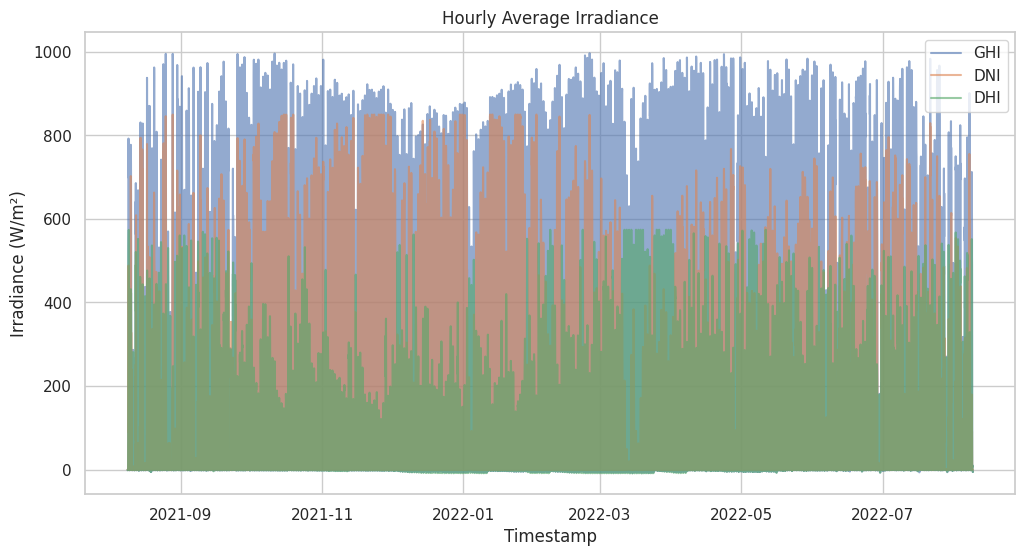

In [8]:
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_resampled = df_clean.resample('1H', on='Timestamp').mean()  # or '1D'

plt.figure(figsize=(12,6))
plt.plot(df_resampled.index, df_resampled['GHI'], label='GHI', alpha=0.6)
plt.plot(df_resampled.index, df_resampled['DNI'], label='DNI', alpha=0.6)
plt.plot(df_resampled.index, df_resampled['DHI'], label='DHI', alpha=0.6)
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.title('Hourly Average Irradiance')
plt.legend()
plt.show()



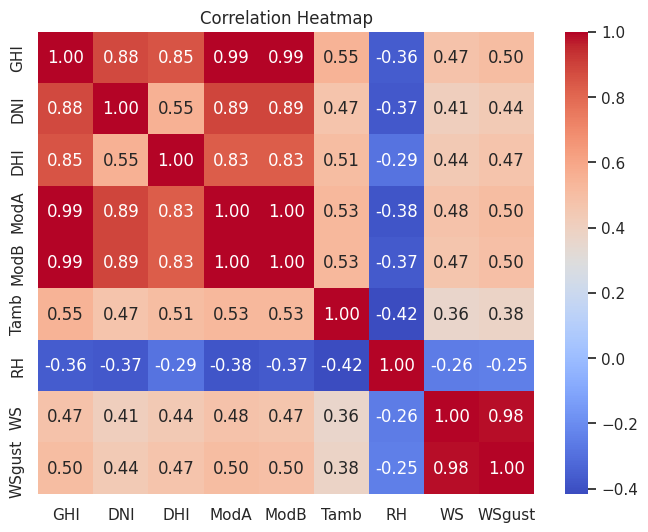

In [9]:
plt.figure(figsize=(8,6))
corr = df_clean[["GHI","DNI","DHI","ModA","ModB","Tamb","RH","WS","WSgust"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


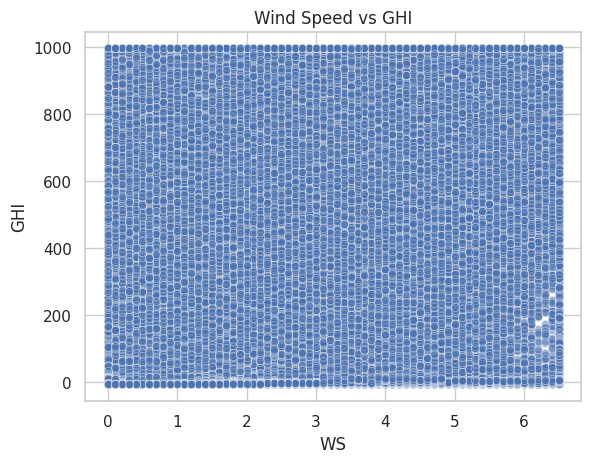

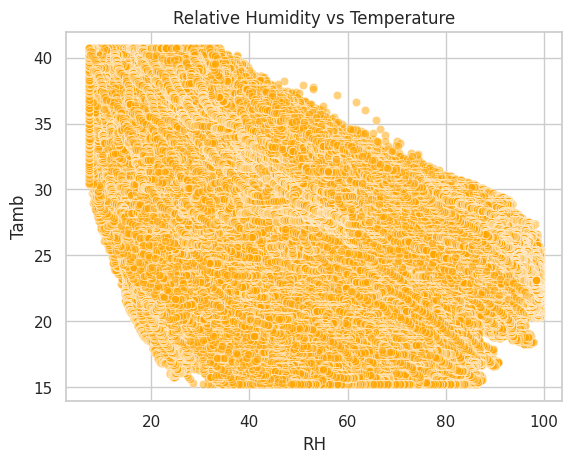

In [10]:
sns.scatterplot(x="WS", y="GHI", data=df_clean, alpha=0.5)
plt.title("Wind Speed vs GHI")
plt.show()

sns.scatterplot(x="RH", y="Tamb", data=df_clean, alpha=0.5, color='orange')
plt.title("Relative Humidity vs Temperature")
plt.show()


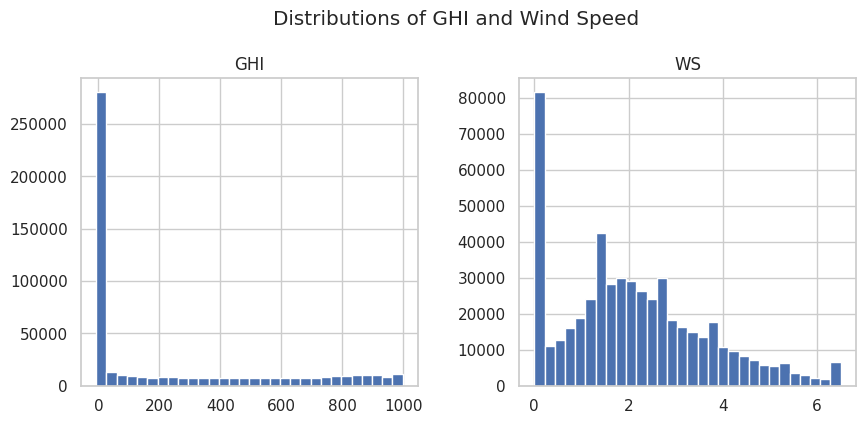

In [11]:
df_clean[['GHI','WS']].hist(bins=30, figsize=(10,4))
plt.suptitle("Distributions of GHI and Wind Speed", y=1.05)
plt.show()


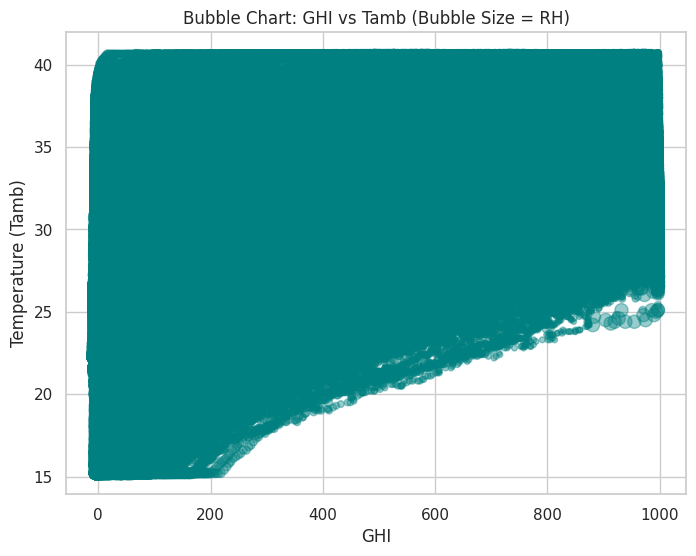

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'],
            s=df_clean['RH'], alpha=0.4, color='teal')
plt.xlabel('GHI')
plt.ylabel('Temperature (Tamb)')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.show()


## Step 6: Cleaning Impact Analysis

Compare the mean of `ModA` and `ModB` **before and after cleaning** to assess how much imputation and clipping affected sensor readings.


In [13]:
impact = pd.DataFrame({
    "Before_Cleaning": df[["ModA", "ModB"]].mean(),
    "After_Cleaning": df_clean[["ModA", "ModB"]].mean()
})
impact


,Before_Cleaning,After_Cleaning
ModA,236.589496,236.231029
ModB,228.883576,228.453272


## Step 7: Key Insights from Benin EDA

- The dataset contains approximately one year of minute-level data.
- Most missing values were minor (<5%) and handled via median imputation.
- Around ~1.5% of data points were potential outliers before cleaning.
- Strong correlation observed between **GHI, DNI, and DHI**, as expected.
- Moderate correlation between **temperature (Tamb)** and **irradiance (GHI)**.
- After cleaning, ModA and ModB readings stabilized, indicating successful outlier handling.
- Wind speed (WS) and humidity (RH) show mild influence on temperature variation.

 
